June 2nd, 2025

## Reduced QLT hot + cold electron whistler compared with [Roytershteyn and Delzanno PoP 2021](https://pubs.aip.org/aip/pop/article-abstract/28/4/042903/263604/Nonlinear-coupling-of-whistler-waves-to-oblique?redirectedFrom=fulltext)

In [4]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz 
import scipy

In [6]:
%matplotlib inline
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

In [7]:
def Z(xi):
    # plasma dispersion function
    return 1j * np.sqrt(np.pi) * wofz(xi)

def xi_1(z, q, beta_par, M=1, ions=False):
    # phase velocity (with cycltron frequency)
    if ions: 
        return (M*z+1)/(np.abs(q)*np.sqrt(beta_par)*np.sqrt(M))
    else:
        return (z-1)/(np.abs(q)*np.sqrt(beta_par))

def xi_0(z, q, beta_par, M=1):
    # phase velocity 
    return z/(np.abs(q)*np.sqrt(beta_par)*np.sqrt(M))

def eta(z, A, q, beta_par):
    # non-dimensional number
    return (z*(A+1) - A)/(np.abs(q) * np.sqrt(beta_par))

### QLT equations
\begin{align*}
    \frac{\mathrm{d}\beta^{r}_{\perp c}}{\mathrm{d} \tau} &= -2 \sqrt{\pi} \int_{0}^{\infty}\frac{\mathcal{E}(q, \tau)}{q^2} \mathrm{Re}\{\xi_{c}^{1}\} \exp(-\mathrm{Re}\{\xi_{c}^{1}\}^2)\left((\mathrm{Re}\{z\} -1)A_{c} + \mathrm{Re}\{z\} \right)\mathrm{d}q,\\
    \frac{\mathrm{d}\beta^{r}_{\| c}}{\mathrm{d} \tau} &=  4\sqrt{\pi} \int_{0}^{\infty}\frac{\mathcal{E}(q, \tau)}{q^2} \mathrm{Re}\{\xi_{c}^{0} + \xi_{c}^{1}\} \exp(-\mathrm{Re}\{\xi_{c}^{1}\}^2)\left((\mathrm{Re}\{z\} -1)A_{c} + \mathrm{Re}\{z\} \right)\mathrm{d}q,\\
    \frac{\mathrm{d}\beta^{r}_{\perp h}}{\mathrm{d} \tau} &= -2 \sqrt{\pi} \int_{0}^{\infty}\frac{\mathcal{E}(q, \tau)}{q^2} \mathrm{Re}\{\xi_{h}^{1}\} \exp(-\mathrm{Re}\{\xi_{h}^{1}\}^2)\left((\mathrm{Re}\{z\} -1)A_{h} + \mathrm{Re}\{z\} \right)\mathrm{d}q,\\
    \frac{\mathrm{d}\beta^{r}_{\| h}}{\mathrm{d} \tau} &=  4\sqrt{\pi} \int_{0}^{\infty}\frac{\mathcal{E}(q, \tau)}{q^2} \mathrm{Re}\{\xi_{h}^{0} + \xi_{h}^{1}\} \exp(-\mathrm{Re}\{\xi_{h}^{1}\}^2)\left((\mathrm{Re}\{z\} -1)A_{h} + \mathrm{Re}\{z\} \right)\mathrm{d}q,\\
    \partial_{\tau} \mathcal{E}(q, \tau) &= 2 \mathrm{Im}\{z\} \mathcal{E}(q, \tau),
\end{align*}

The dispersion relation reads as 
\begin{equation*}
    q^{2} - \xi_{i}^{0}Z(\xi_{i}^{1})- \left(1-\delta\right)\left(A_{c} + \eta_{c} Z(\xi_{c}^{1}\right) )- \delta \left(A_{h} + \eta_{h} Z(\xi_{h}^{1})\right) = 0, \qquad \mathrm{with} \qquad \eta_{s} \coloneqq \frac{(A_{s} + 1) z - A_{s}}{q \sqrt{\beta_{\|s}}}, \qquad \delta \coloneqq \frac{n_{h}}{n_{0}}, \qquad \xi_{s}^{1} = \frac{z-1}{|q|\sqrt{\beta_{\|s}}}.
\end{equation*}

In [8]:
# # Low-anisotropy case
# # with cold electrons nc/n0 != 0 
# delta =  0.2 # ratio of hot electron population
# B0 = 0.25

# # hot 
# beta_par_h_init = 0.0256747/delta # initial beta parallel 
# A_h_init = 2 # initial anisotropic level

# # cold
# beta_par_c_init = beta_par_h_init/2000/(1-delta) # initial beta parallel 
# A_c_init = 0. # initial anisotropic level 

# # ions 
# beta_par_i_init = beta_par_c_init*(1-delta)
# q_vec = np.linspace(0.7, 2, 50) # vector with all normalized wavenumber

In [18]:
# High-anisotropy case
# with cold electrons nc/n0 != 0 
delta =  0.2 # ratio of hot electron population
B0 = 0.25

# hot 
beta_par_h_init = 0.025/delta # initial beta parallel 
A_h_init = 4 # initial anisotropic level

# cold
beta_par_c_init = beta_par_h_init/200/(1-delta)  # beta_par_h_init/2000 # initial beta parallel 
A_c_init = 0. # initial anisotropic level 

# ions 
beta_par_i_init = beta_par_c_init*(1-delta)
q_vec = np.linspace(0.7, 2, 50) # vector with all normalized wavenumber

In [19]:
t_max = 500

beta_perp_c_init =  (A_c_init + 1) * beta_par_c_init  # initial beta perpendicular 
beta_perp_h_init =  (A_h_init + 1) * beta_par_h_init  # initial beta perpendicular 

dB_init = 1e-8 * np.ones(len(q_vec)) # initial wave energy density noise level

In [20]:
# dispersion relation 
def dispersion_relation(q, 
                        beta_par_c,
                        beta_par_h, 
                        beta_par_i,
                        A_c,
                        A_h, 
                        delta, 
                        M=1836):
    return lambda z: q**2 - xi_0(z=z, q=q, beta_par=beta_par_i, M=M)*Z(xi=xi_1(z=z, q=q, beta_par=beta_par_i, M=M))\
                           - (1-delta)*(A_c + eta(z, A=A_c, q=q, beta_par=beta_par_c)*Z(xi=xi_1(z, q=q, beta_par=beta_par_c)))\
                           - delta *(A_h + eta(z, A=A_h, q=q, beta_par=beta_par_h)*Z(xi=xi_1(z, q=q, beta_par=beta_par_h)))
    

In [21]:
def get_z_vec(q_vec, A_h, A_c, beta_par_c, beta_par_h, beta_par_i, delta):
    z_vec = np.zeros(len(q_vec), dtype="complex128")
    for ii, q in enumerate(q_vec):
        if q < 1.5:
            ic1 = 0.55+ 1e-4j
            ic2 = 0.8+ 1e-4j
        else:
            ic1 = 0.65+ 1e-4j
            ic2 = 0.8+ 1e-4j
        try:
            z_vec[ii] = scipy.optimize.newton(dispersion_relation(q=q, A_c=A_c, beta_par_c=beta_par_c, A_h=A_h, beta_par_h=beta_par_h, beta_par_i=beta_par_i, delta=delta), ic1, tol=1e-15)
            if dispersion_relation(q=q, A_c=A_c, beta_par_c=beta_par_c, A_h=A_h, beta_par_h=beta_par_h, beta_par_i=beta_par_i, delta=delta)(z_vec[ii]) > 1e-10:
                print("q1=", q)
                print("residual1=", np.abs(dispersion_relation(q=q, A_c=A_c, beta_par_c=beta_par_c, A_h=A_h, beta_par_h=beta_par_h, beta_par_i=beta_par_i, delta=delta)(z_vec[ii])))
        except:
            z_vec[ii] = scipy.optimize.newton(dispersion_relation(q=q, A_c=A_c, beta_par_c=beta_par_c, A_h=A_h, beta_par_h=beta_par_h, beta_par_i=beta_par_i, delta=delta), ic2, tol=1e-15)
            if dispersion_relation(q=q, A_c=A_c, beta_par_c=beta_par_c, A_h=A_h, beta_par_h=beta_par_h, beta_par_i=beta_par_i, delta=delta)(z_vec[ii]) > 1e-10:
                print("q3=", q)
                print("residual3=", np.abs(dispersion_relation(q=q, A_c=A_c, beta_par_c=beta_par_c, A_h=A_h, beta_par_h=beta_par_h, beta_par_i=beta_par_i, delta=delta)(z_vec[ii])))
    return z_vec

In [22]:
sol_ = get_z_vec(q_vec=q_vec, A_c=A_c_init, beta_par_c=beta_par_c_init, beta_par_i=beta_par_i_init, A_h=A_h_init, beta_par_h=beta_par_h_init, delta=delta)

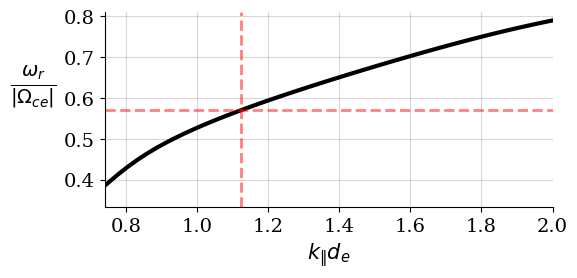

In [23]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(q_vec, sol_.real, linewidth=3, color="black")
ax.axvline(q_vec[np.argmax(sol_.imag)], ls="--", color="red", alpha=0.5, linewidth=2)
ax.axhline(sol_.real[np.argmax(sol_.imag)], ls="--", color="red", alpha=0.5, linewidth=2)
ax.set_ylabel(r'$\frac{\omega_{r}}{|\Omega_{ce}|}$', labelpad=22, rotation=0, fontsize=20)
ax.set_xlabel('$k_{\|}d_{e}$', fontsize=15)
ax.set_xlim(0.74, 2)
ax.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("../figs/vadim_2021/dispersion_high_anisotropy_frequency.png", dpi=300, bbox_inches='tight')

In [24]:
sol_.real[np.argmax(sol_.imag)]

0.5699878197114997

In [25]:
q_vec[np.argmax(sol_.imag)]

1.1244897959183673

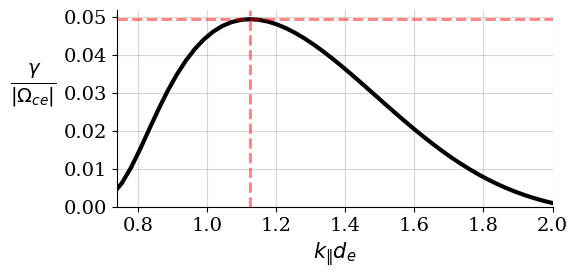

In [26]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(q_vec, sol_.imag, linewidth=3, color="black")
ax.axvline(q_vec[np.argmax(sol_.imag)], ls="--", color="red", alpha=0.5, linewidth=2)
ax.axhline(sol_.imag[np.argmax(sol_.imag)], ls="--", color="red", alpha=0.5, linewidth=2)

ax.set_ylabel(r'$\frac{\gamma}{|\Omega_{ce}|}$', labelpad=22, rotation=0, fontsize=20)
ax.set_xlabel('$k_{\|}d_{e}$', fontsize=15)
#ax.set_xlim(0.74, 1.4)
ax.set_ylim(0)
ax.set_xlim(0.74, 2)
#ax.set_ylim(0, 0.021)
ax.set_yticks([0, 0.01, 0.02, 0.03, 0.04, 0.05])
#ax.set_yticklabels([0, 0.01, 0.02])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("../figs/vadim_2021/dispersion_relation_high_anisotropy_growth_rate.png", dpi=300, bbox_inches='tight')